In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc


In [2]:
df = pd.read_csv(r'C:\Users\Hp\Desktop\credit card\default of credit card clients.csv', delimiter=';')

In [3]:
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [4]:
df.columns = df.iloc[0]

In [5]:
df = df.drop(0).reset_index(drop=True)

In [6]:
df.rename(columns={'default payment next month': "DEFAULT"}, inplace=True)

In [7]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         30000 non-null  object
 1   LIMIT_BAL  30000 non-null  object
 2   SEX        30000 non-null  object
 3   EDUCATION  30000 non-null  object
 4   MARRIAGE   30000 non-null  object
 5   AGE        30000 non-null  object
 6   PAY_0      30000 non-null  object
 7   PAY_2      30000 non-null  object
 8   PAY_3      30000 non-null  object
 9   PAY_4      30000 non-null  object
 10  PAY_5      30000 non-null  object
 11  PAY_6      30000 non-null  object
 12  BILL_AMT1  30000 non-null  object
 13  BILL_AMT2  30000 non-null  object
 14  BILL_AMT3  30000 non-null  object
 15  BILL_AMT4  30000 non-null  object
 16  BILL_AMT5  30000 non-null  object
 17  BILL_AMT6  30000 non-null  object
 18  PAY_AMT1   30000 non-null  object
 19  PAY_AMT2   30000 non-null  object
 20  PAY_AMT3   30000 non-null  o

In [9]:
df = df.apply(pd.to_numeric, errors='coerce')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_0      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

In [11]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


# Exploratory Data Analysis

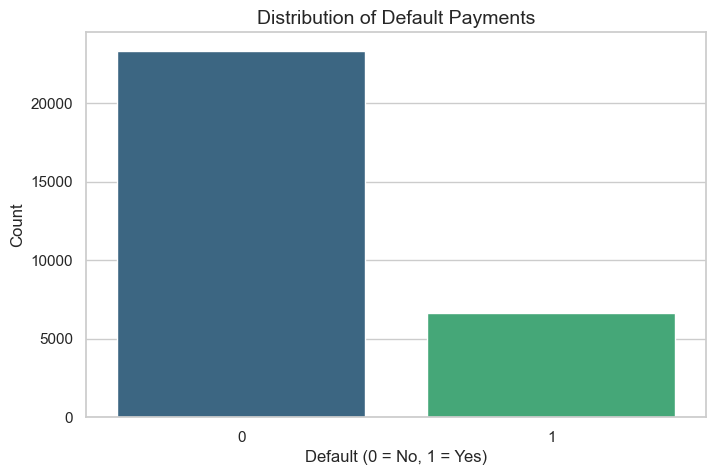

In [12]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 5))
sns.countplot(x='DEFAULT', data=df, palette="viridis")
plt.title("Distribution of Default Payments", fontsize=14)
plt.xlabel("Default (0 = No, 1 = Yes)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

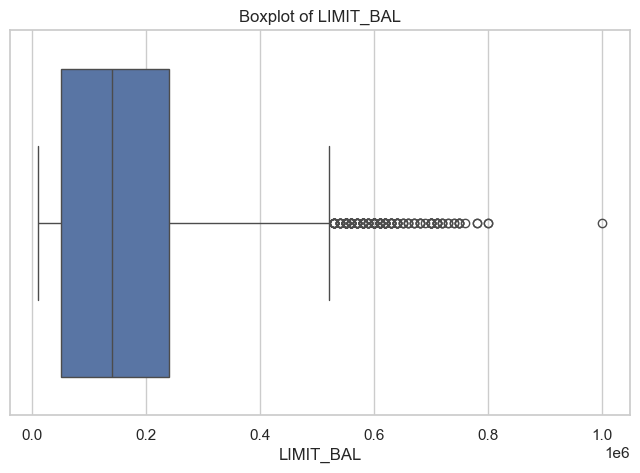

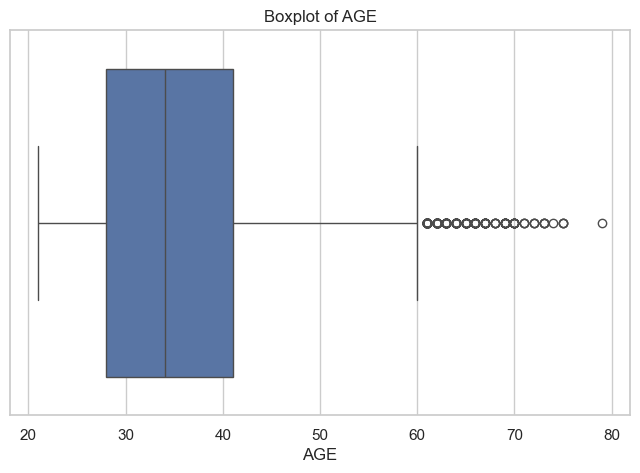

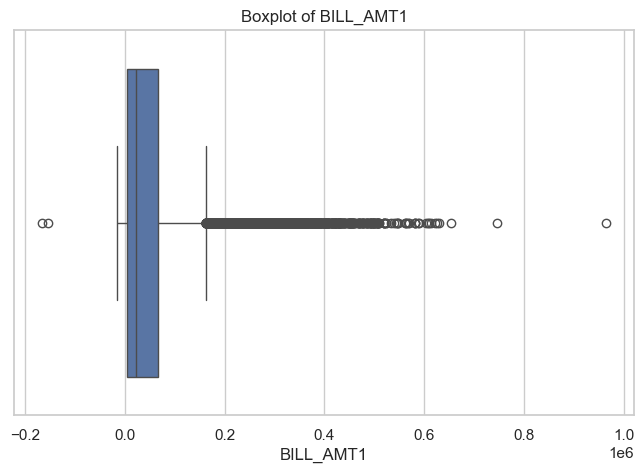

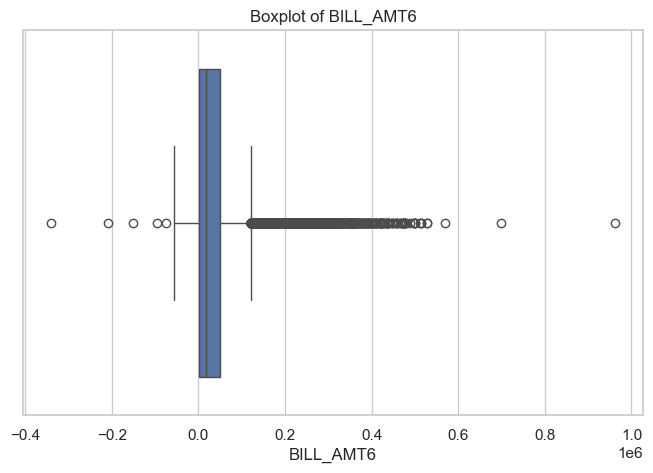

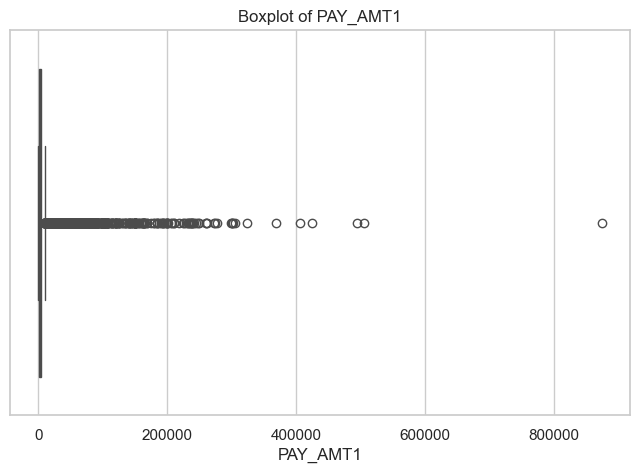

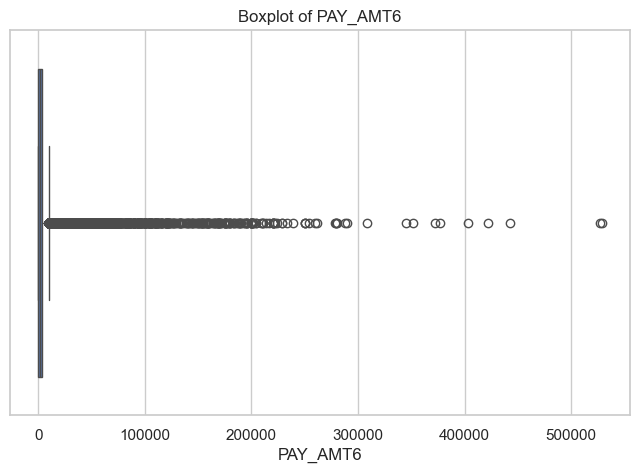

In [13]:
for col in ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT6',  'PAY_AMT1', 'PAY_AMT6']:

    x = df[col]
    
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[col])
    
    plt.title(f"Boxplot of {col}")
    plt.show()

In [14]:
df['SEX'].value_counts()

SEX
2    18112
1    11888
Name: count, dtype: int64

In [15]:
df['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

In [16]:
fil = (df['EDUCATION'] == 5) | (df['EDUCATION'] == 6) | (df['EDUCATION'] == 0)
df.loc[fil, 'EDUCATION'] = 4
df['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
4      468
Name: count, dtype: int64

In [17]:
df['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

In [18]:
fil = (df['MARRIAGE'] == 0)
df.loc[fil, 'MARRIAGE'] = 3
df['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      377
Name: count, dtype: int64

In [19]:
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']
df_cat = df[categorical_features]


In [20]:
df_cat['Defaulter'] = df['DEFAULT']
df_cat.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}, 'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)


In [21]:
df_cat

,SEX,EDUCATION,MARRIAGE,Defaulter
0,FEMALE,university,married,1
1,FEMALE,university,single,1
2,FEMALE,university,single,0
3,FEMALE,university,married,0
4,MALE,university,married,0
...,...,...,...,...
29995,MALE,high school,married,0
29996,MALE,high school,single,0
29997,MALE,university,single,1
29998,MALE,high school,married,1


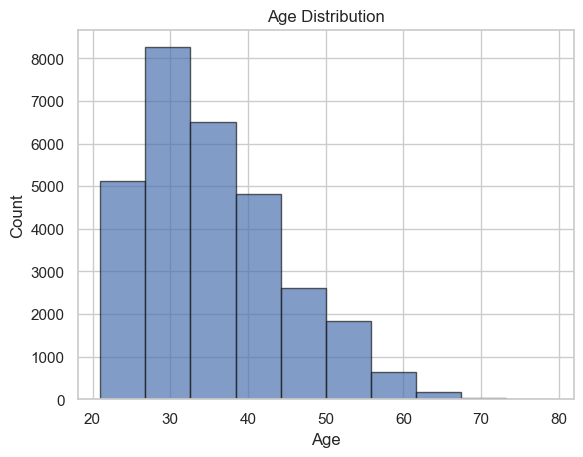

In [22]:
plt.hist(df['AGE'], bins=10, edgecolor='k', alpha=0.7)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [23]:
def format_count(pct, all_values):
    absolute = int(round(pct / 100. * sum(all_values)))
    return f"{absolute}"

In [24]:
plt.figure(figsize=(10,5))
fig, axes = plt.subplots(ncols=2,figsize=(12,5))
df_cat['SEX'].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
sns.countplot(x = 'SEX', hue = 'Defaulter', data = df_cat)
plt.title('Counts of Genders and defaulters of them')

Text(0.5, 1.0, 'Counts of Genders and defaulters of them')

In [25]:
plt.figure(figsize=(10,5))
fig, axes = plt.subplots(ncols=2,figsize=(12,5))
df_cat['MARRIAGE'].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
sns.countplot(x = 'MARRIAGE', hue = 'Defaulter', data = df_cat)
plt.title('Counts of Marriages and defaulters of them')

Text(0.5, 1.0, 'Counts of Marriages and defaulters of them')

In [26]:
plt.figure(figsize=(10,5))
fig, axes = plt.subplots(ncols=2,figsize=(12,5))
df_cat['EDUCATION'].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
sns.countplot(x = 'EDUCATION', hue = 'Defaulter', data = df_cat)
plt.title('Counts of Education and defaulters of them')

Text(0.5, 1.0, 'Counts of Education and defaulters of them')

In [27]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(x="DEFAULT", y="LIMIT_BAL", data=df)

In [28]:
# Distribution of repayment status
for col in ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']:
  
  plt.figure(figsize=(10,3))
  sns.countplot(x = col, hue = 'DEFAULT', data = df)


<Figure size 1000x500 with 0 Axes>

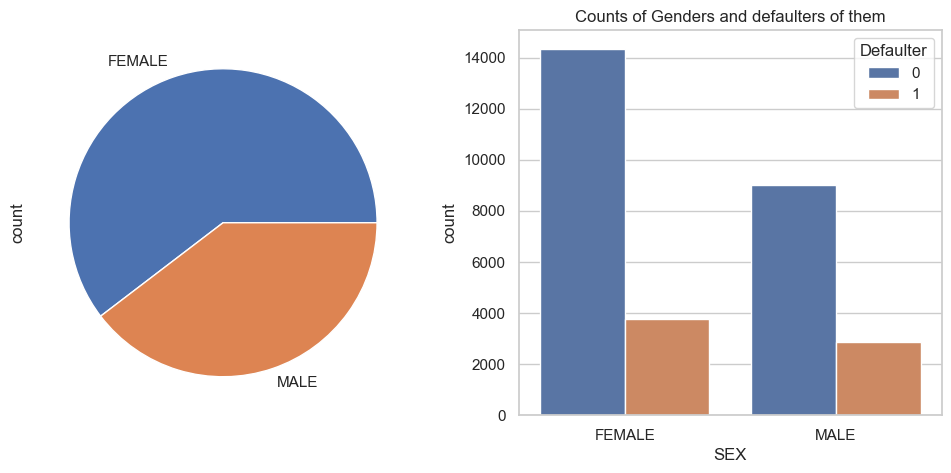

<Figure size 1000x500 with 0 Axes>

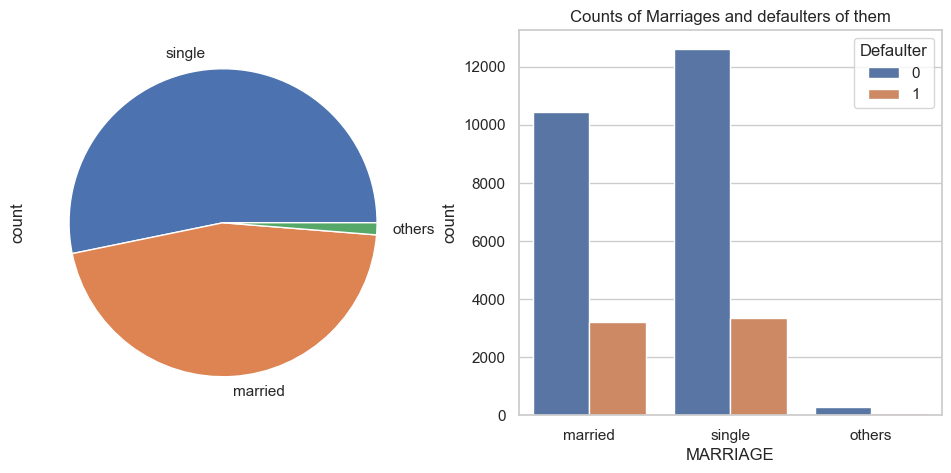

<Figure size 1000x500 with 0 Axes>

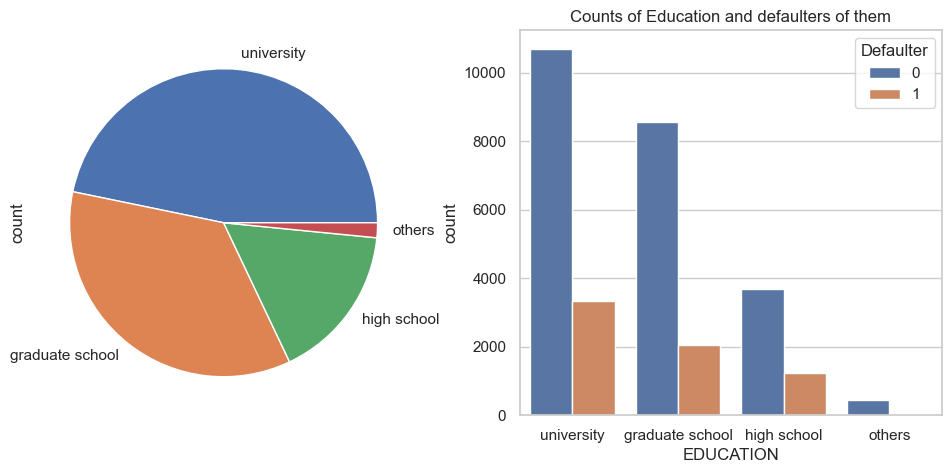

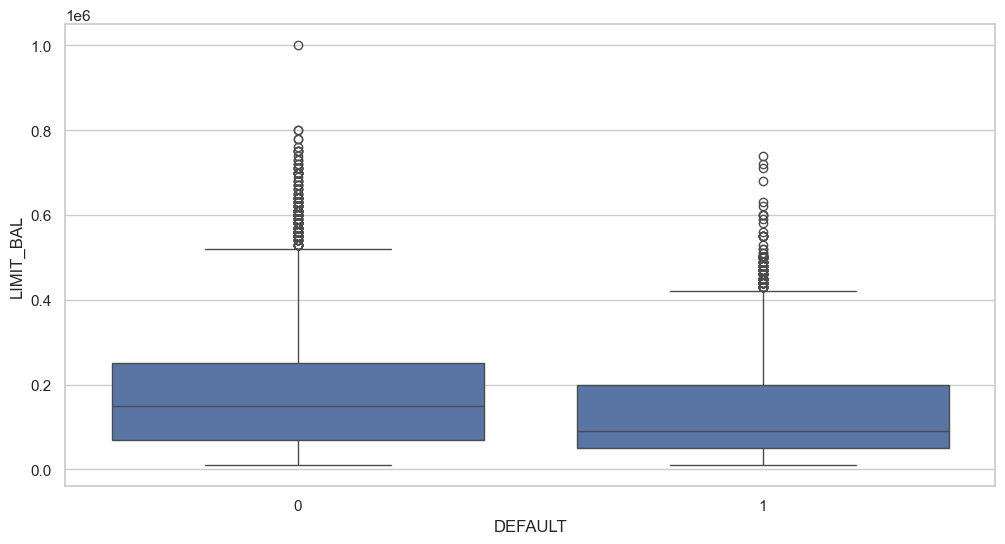

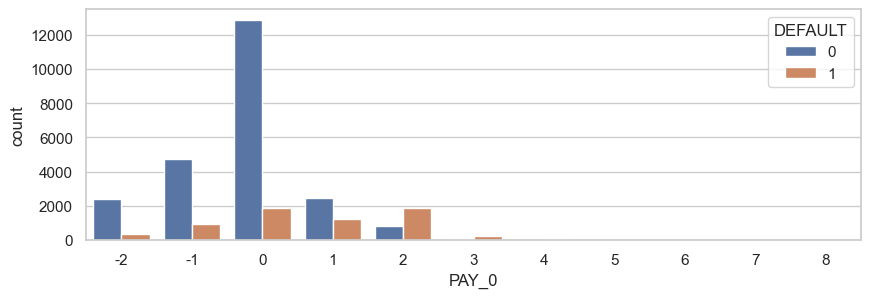

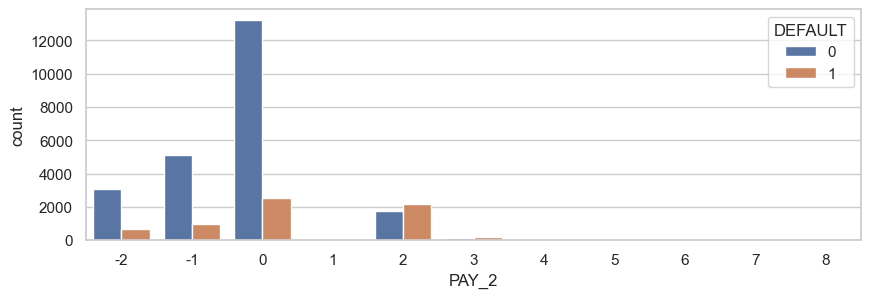

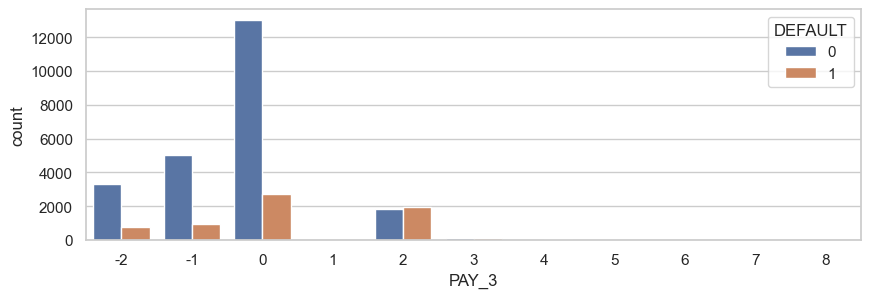

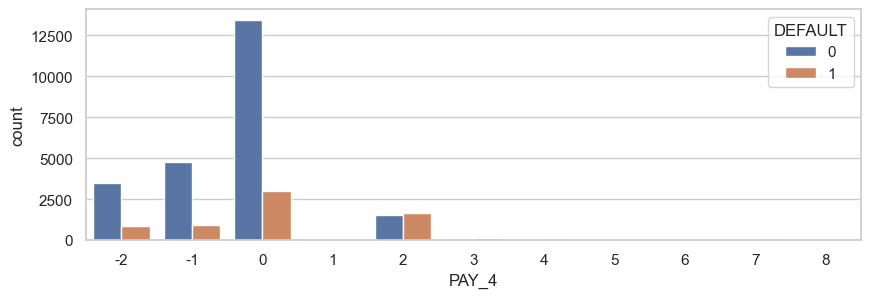

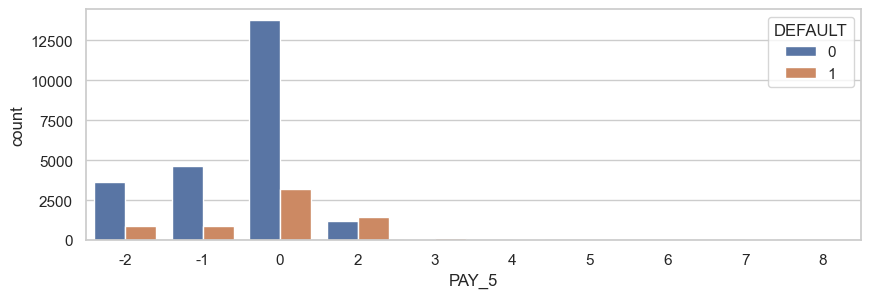

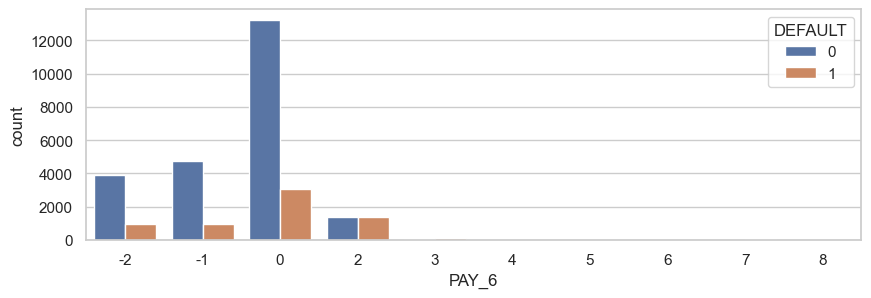

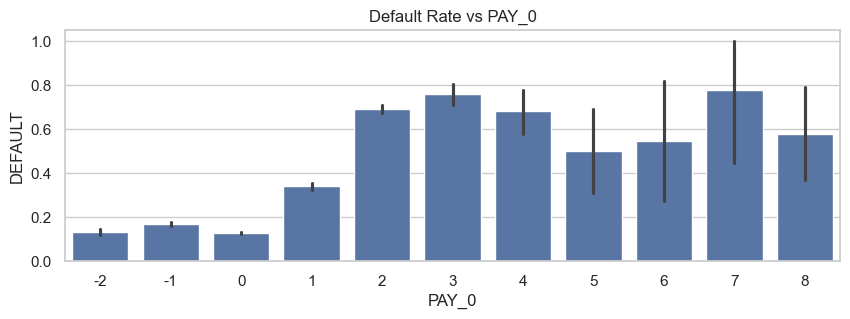

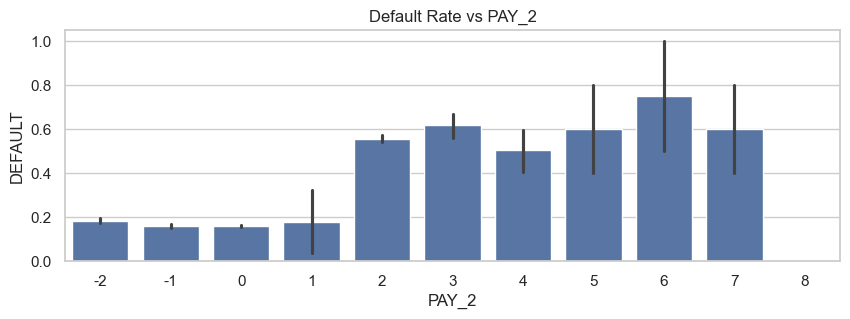

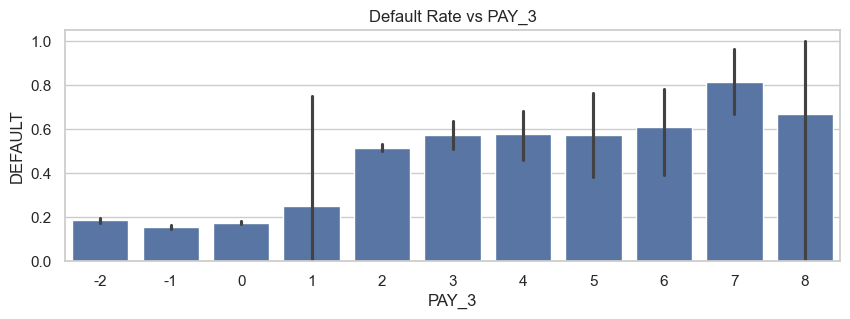

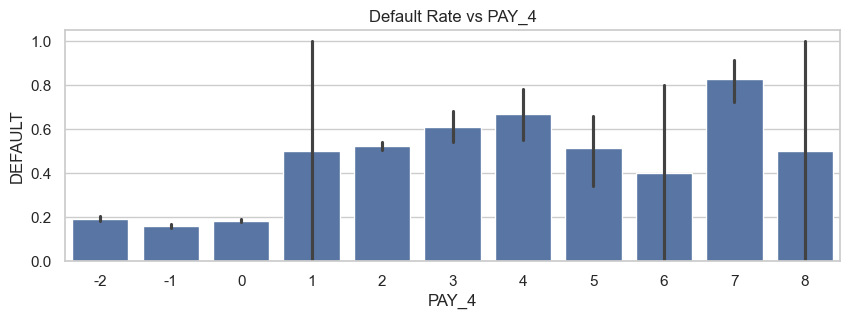

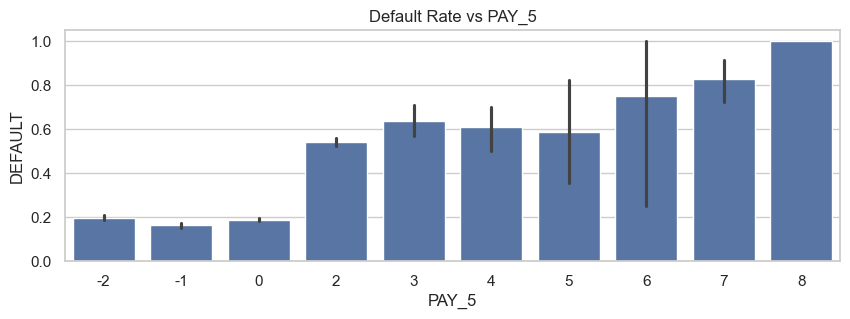

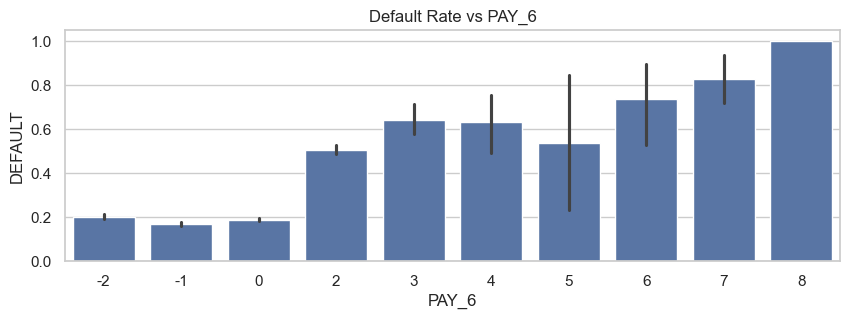

In [29]:

repayment_cols = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for col in repayment_cols:
    plt.figure(figsize=(10,3))
    sns.barplot(data=df, x=col, y='DEFAULT')
    plt.title(f'Default Rate vs {col}')
    plt.show()


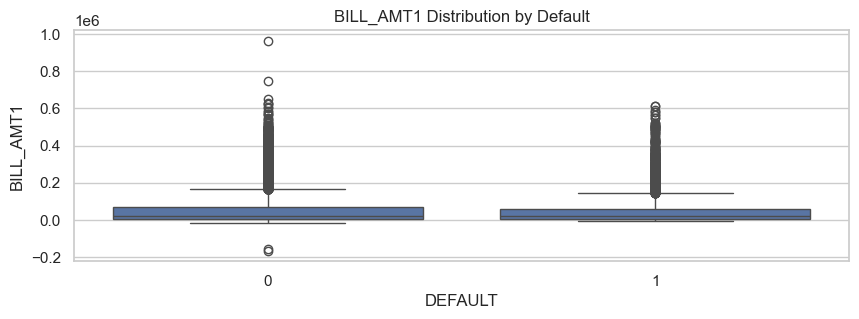

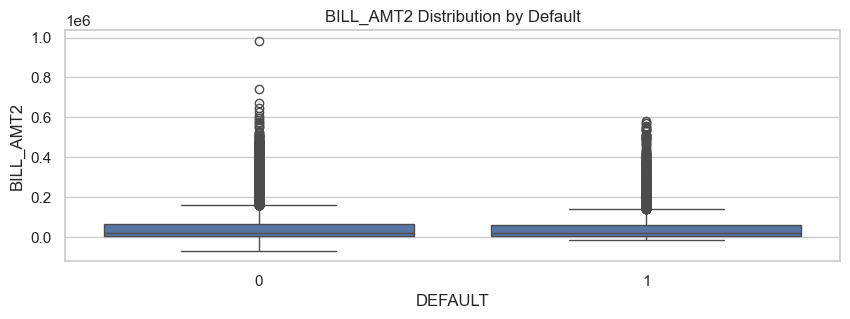

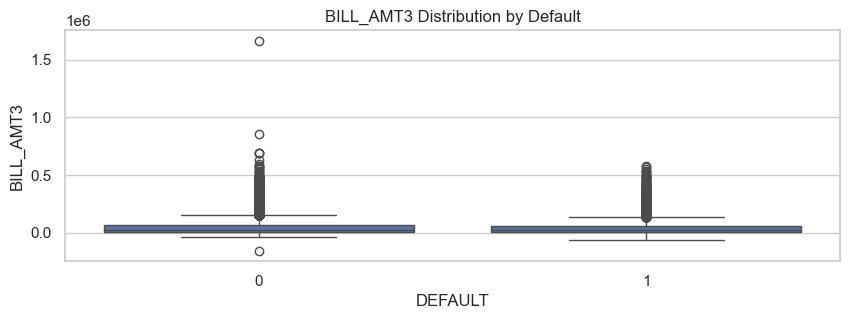

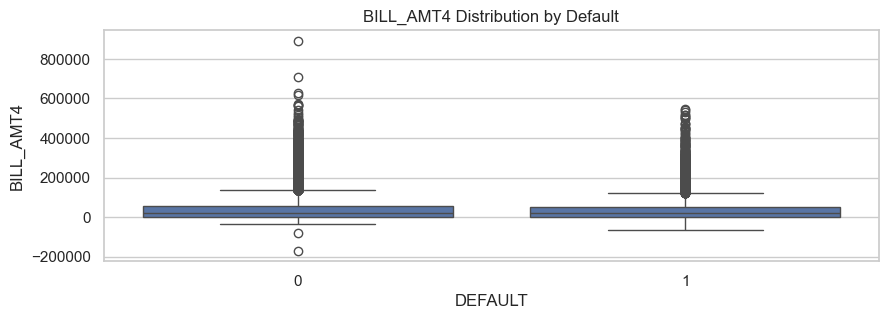

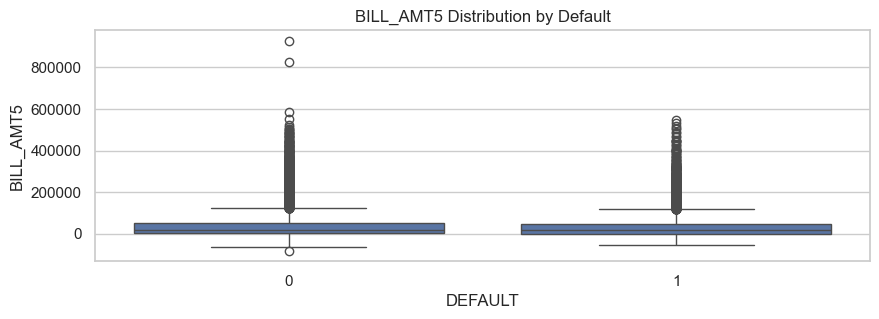

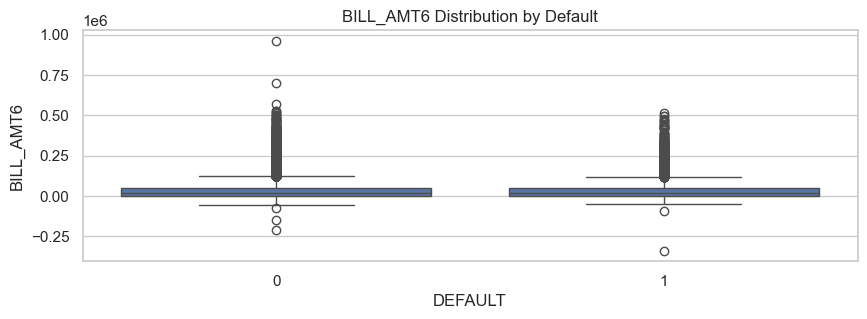

In [30]:
# Bill amounts vs default
for col in ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']:
    plt.figure(figsize=(10,3))
    sns.boxplot(data=df, x='DEFAULT', y=col)
    plt.title(f'{col} Distribution by Default')
    plt.show()


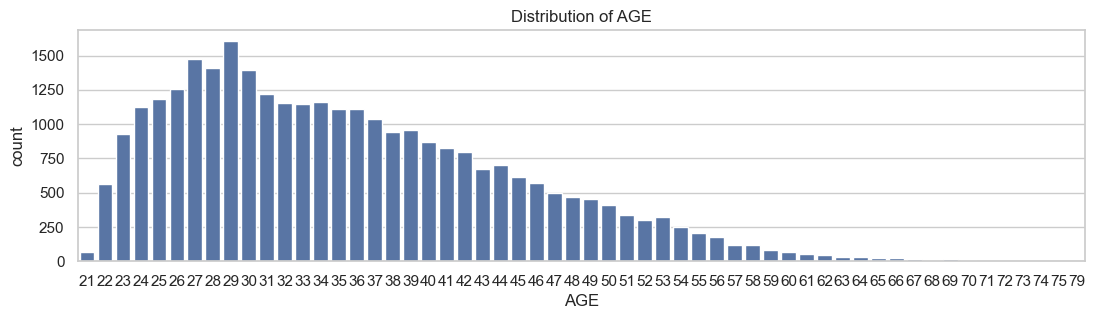

In [31]:
    plt.figure(figsize=(13,3))
    sns.countplot(data=df, x='AGE')
    plt.title('Distribution of AGE')
    plt.show()

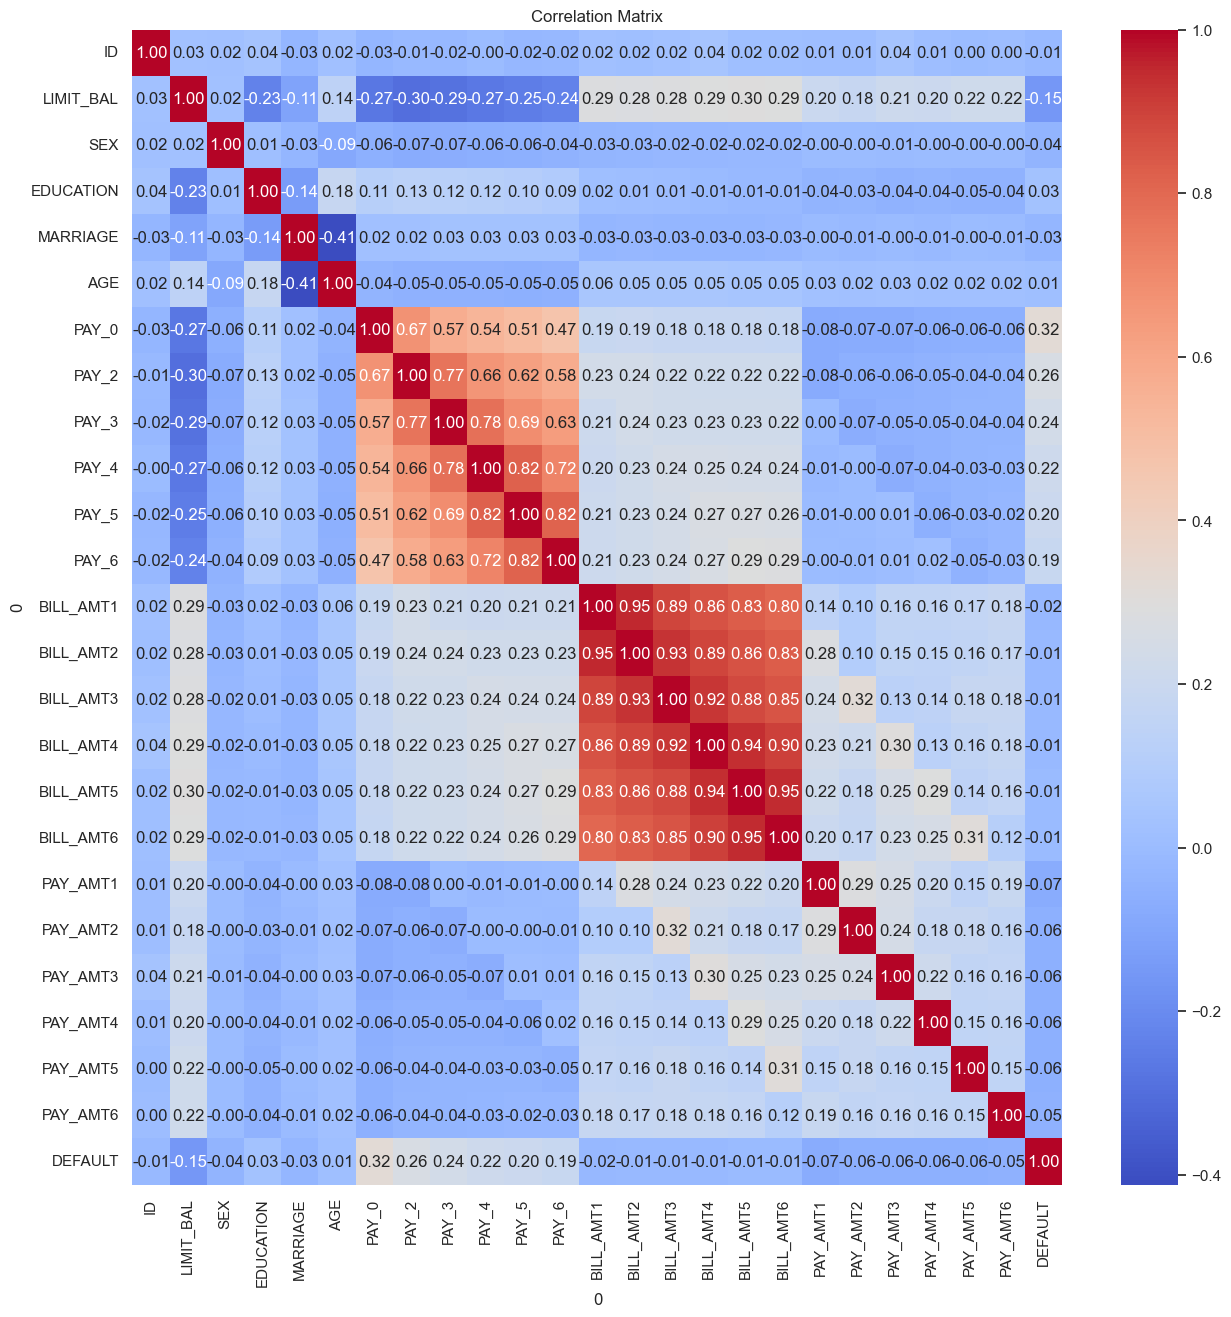

In [32]:
corr_matrix = df.corr()

# Heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [33]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

x_smote, y_smote = smote.fit_resample(df.iloc[:,0:-1], df['DEFAULT'])

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 30000
Resampled dataset shape 46728


In [34]:
columns = list(df.columns)
columns.pop()

'DEFAULT'

In [35]:
balance_df = pd.DataFrame(x_smote, columns=columns)
balance_df['DEFAULT'] = y_smote

In [36]:
sns.countplot( balance_df, x='DEFAULT')

<Axes: xlabel='DEFAULT', ylabel='count'>

# Feature Engineering

In [37]:
df_fe = balance_df.copy()

##### Combine all Bill Amounts together and drop other Bill Amounts because of high correlation

In [38]:
df_fe['BILL_AMT'] = df_fe['BILL_AMT1'] + df_fe['BILL_AMT2'] + df_fe['BILL_AMT3'] + df_fe['BILL_AMT4'] + df_fe['BILL_AMT5'] + df_fe['BILL_AMT6'] 

In [39]:
df_fe.drop(['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'],axis = 1, inplace = True)

##### Change categorical numeric values to words

In [40]:
df_fe.replace({'SEX': {1 : 0, 2 : 1}, 
               'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}, 
               'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

##### One Hot Encoding

In [41]:
df_fe = pd.get_dummies(df_fe, columns=['EDUCATION','MARRIAGE'])

In [42]:
df_fe.drop(['EDUCATION_others','MARRIAGE_others'], axis=1, inplace=True)

In [43]:
df_fe.drop('ID', axis=1, inplace=True)

# Building Models

In [44]:
X = df_fe.drop('DEFAULT', axis=1)
y = df_fe['DEFAULT']

In [45]:
cols = X.columns

In [46]:
ss = StandardScaler()

In [47]:
X = ss.fit_transform(X)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Logistic Regression

In [49]:
params_lr = {'penalty':['l1','l2'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

In [50]:
grid_lr = GridSearchCV(LogisticRegression(), params_lr, scoring = 'accuracy', n_jobs = -1, cv = 3)
grid_lr.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [51]:
optimized_clf = grid_lr.best_estimator_

In [52]:
grid_lr.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [53]:
grid_lr.best_score_

0.7219654168806712

In [54]:
train_preds = optimized_clf.predict_proba(X_train)[:,1]
test_preds = optimized_clf.predict_proba(X_test)[:,1]

In [55]:
train_class_preds = optimized_clf.predict(X_train)
test_class_preds = optimized_clf.predict(X_test)

In [56]:
train_accuracy_lr = accuracy_score(train_class_preds,y_train)
test_accuracy_lr = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_lr)
print("The accuracy on test data is ", test_accuracy_lr)

The accuracy on train data is  0.7226216971979684
The accuracy on test data is  0.7186269474405068


In [57]:
test_accuracy_lr = accuracy_score(test_class_preds,y_test)
test_precision_score_lr = precision_score(test_class_preds,y_test)
test_recall_score_lr = recall_score(test_class_preds,y_test)
test_f1_score_lr = f1_score(test_class_preds,y_test)
test_roc_score_lr = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_lr)
print("The precision on test data is ", test_precision_score_lr)
print("The recall on test data is ", test_recall_score_lr)
print("The f1 on test data is ", test_f1_score_lr)
print("The roc_score on test data is ", test_roc_score_lr)

The accuracy on test data is  0.7186269474405068
The precision on test data is  0.7223264540337712
The recall on test data is  0.7185273159144893
The f1 on test data is  0.7204218763289955
The roc_score on test data is  0.7186278597540657


[[12567  4978]
 [ 4743 12758]]


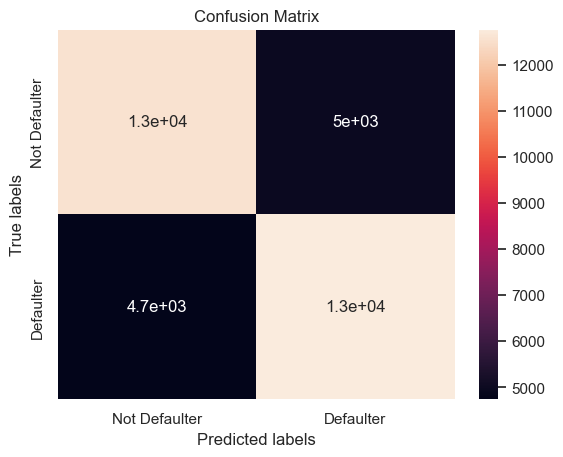

In [58]:
labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

In [59]:
feature_importance = pd.DataFrame({'Features':cols, 'Importance':np.abs(optimized_clf.coef_).ravel() })

In [60]:
feature_importance = feature_importance.sort_values(by = 'Importance', ascending=False)[:10]

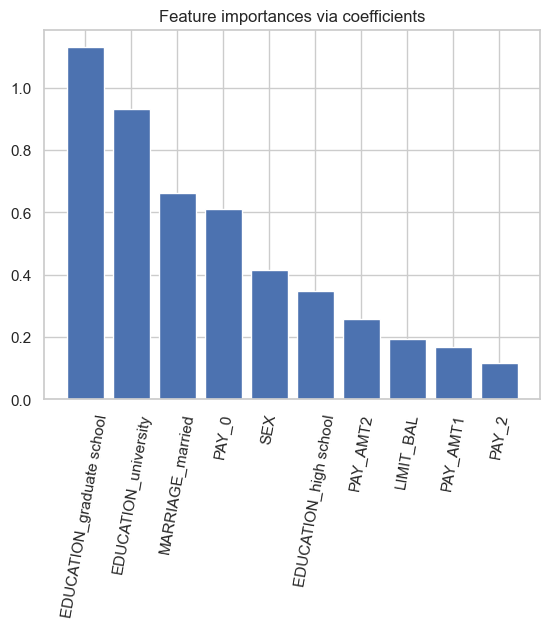

In [61]:
plt.bar(height=feature_importance['Importance'], x= feature_importance['Features'])
plt.xticks(rotation=80)
plt.title("Feature importances via coefficients")
plt.show()

In [62]:
y_preds_proba_lr = optimized_clf.predict_proba(X_test)[::,1]


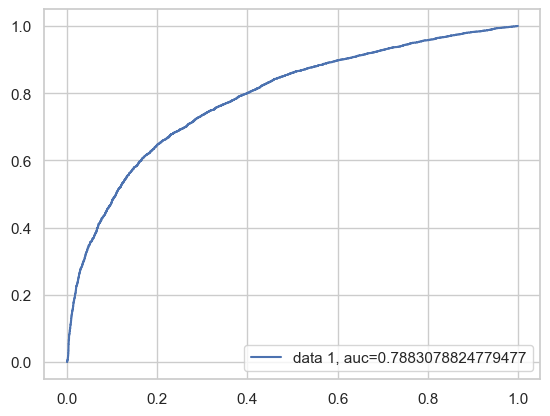

In [63]:
y_pred_proba = y_preds_proba_lr
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Support Vector Classifier

In [64]:
params_svc = {'C' : [0.1, 1, 10, 100], 'kernel' : ['rbf']}

In [65]:
grid_svc = GridSearchCV(SVC(), params_svc, scoring='accuracy', cv=3, n_jobs=-1)

In [66]:
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'kernel': ['rbf']},
             scoring='accuracy')

In [67]:
optimal_svc = grid_svc.best_estimator_

In [68]:
grid_svc.best_params_

{'C': 10, 'kernel': 'rbf'}

In [69]:
grid_svc.best_score_

0.7624265251383896

In [70]:
train_class_preds = optimal_svc.predict(X_train)
test_class_preds = optimal_svc.predict(X_test)

In [71]:
train_accuracy_SVC = accuracy_score(train_class_preds,y_train)
test_accuracy_SVC = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_lr)
print("The accuracy on test data is ", test_accuracy_lr)

The accuracy on train data is  0.7226216971979684
The accuracy on test data is  0.7186269474405068


In [72]:
test_accuracy_SVC = accuracy_score(test_class_preds,y_test)
test_precision_score_SVC = precision_score(test_class_preds,y_test)
test_recall_score_SVC = recall_score(test_class_preds,y_test)
test_f1_score_SVC = f1_score(test_class_preds,y_test)
test_roc_score_SVC = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_SVC)
print("The precision on test data is ", test_precision_score_SVC)
print("The recall on test data is ", test_recall_score_SVC)
print("The f1 on test data is ", test_f1_score_SVC)
print("The roc_score on test data is ", test_roc_score_SVC)

The accuracy on test data is  0.7606574216743708
The precision on test data is  0.7296605833191199
The recall on test data is  0.7793769356895609
The f1 on test data is  0.7536997885835095
The roc_score on test data is  0.7617214082613799


[[14508  3037]
 [ 3993 13508]]


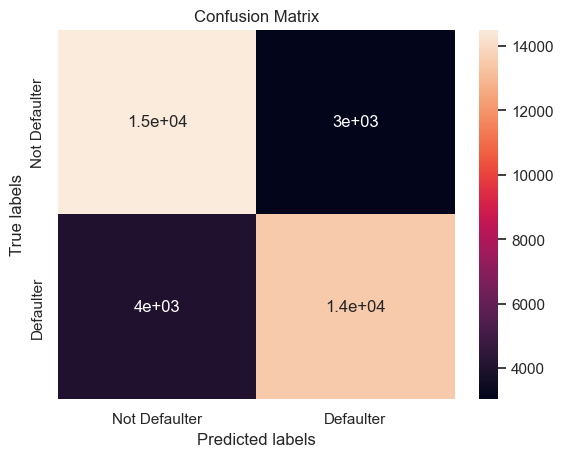

In [73]:
labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

## Decision Tree Classifier

In [74]:
params_dt = {'max_depth': [20,30,50,100], 'min_samples_split':[0.1 ,0.2, 0.4]}

In [75]:
from sklearn.tree import DecisionTreeClassifier  

In [76]:
grid_dt = GridSearchCV(DecisionTreeClassifier(), params_dt, scoring = 'accuracy', n_jobs = -1,  cv = 3)
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [20, 30, 50, 100],
                         'min_samples_split': [0.1, 0.2, 0.4]},
             scoring='accuracy')

In [77]:
grid_dt.best_score_

0.7232494435884266

In [78]:
optimal_dt = grid_dt.best_estimator_

In [79]:
train_class_preds = optimal_dt.predict(X_train)
test_class_preds = optimal_dt.predict(X_test)

In [80]:
grid_dt.best_params_

{'max_depth': 20, 'min_samples_split': 0.1}

In [81]:
train_accuracy_dt = accuracy_score(train_class_preds, y_train)
test_accuracy_dt = accuracy_score(test_class_preds, y_test)

print("The accuracy on train data is ", train_accuracy_dt)
print("The accuracy on test data is ", test_accuracy_dt)

The accuracy on train data is  0.7291559664441021
The accuracy on test data is  0.7133196370484506


## Random Forest Classifier

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [86]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [87]:
train_pred_rf = rf_clf.predict(X_train)
test_pred_rf = rf_clf.predict(X_test)

In [88]:
train_accuracy_rf = accuracy_score(train_pred_rf,y_train)
test_accuracy_rf = accuracy_score(test_pred_rf,y_test)

print("The accuracy on train data is ", train_accuracy_rf)
print("The accuracy on test data is ", test_accuracy_rf)

The accuracy on train data is  0.9994007875363807
The accuracy on test data is  0.8260571819893854


In [95]:
params_rf = {'n_estimators' : [50, 100, 250, 500], 'min_samples_split' : [2, 3, 5], 'max_features' : ['sqrt', 'log2'], 'max_depth' : [5,10,20,30]}

In [96]:
grid_rf = GridSearchCV(RandomForestClassifier(), params_rf, scoring = 'accuracy', n_jobs = -1, cv = 3)

In [97]:
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [50, 100, 250, 500]},
             scoring='accuracy')

In [99]:
grid_rf.best_score_

0.8188951663527936

In [100]:
optimal_rf = grid_rf.best_estimator_

In [101]:
grid_rf.best_params_

{'max_depth': 30,
 'max_features': 'log2',
 'min_samples_split': 2,
 'n_estimators': 500}

In [113]:
train_class_rf = optimal_rf.predict(X_train)
test_class_rf = optimal_rf.predict(X_test)

In [115]:
train_accuracy_rf = accuracy_score(train_class_rf, y_train)
test_accuracy_rf = accuracy_score(test_class_rf, y_test)

print("The accuracy on train data is ", train_accuracy_rf)
print("The accuracy on test data is ", test_accuracy_rf)

The accuracy on train data is  0.9994007875363807
The accuracy on test data is  0.8291388460879986


In [116]:
test_accuracy_rf = accuracy_score(test_class_rf,y_test)
test_precision_score_rf = precision_score(test_class_rf,y_test)
test_recall_score_rf = recall_score(test_class_rf,y_test)
test_f1_score_rf = f1_score(test_class_rf,y_test)
test_roc_score_rf = roc_auc_score(test_class_rf,y_test)

print("The accuracy on test data is ", test_accuracy_rf)
print("The precision on test data is ", test_precision_score_rf)
print("The recall on test data is ", test_recall_score_rf)
print("The f1 on test data is ", test_f1_score_rf)
print("The roc_score on test data is ", test_roc_score_rf)

The accuracy on test data is  0.8291388460879986
The precision on test data is  0.8014668258570697
The recall on test data is  0.8495751220394142
The f1 on test data is  0.8248200807442514
The roc_score on test data is  0.8301687998426628


In [117]:
len(optimal_rf.feature_importances_)

21

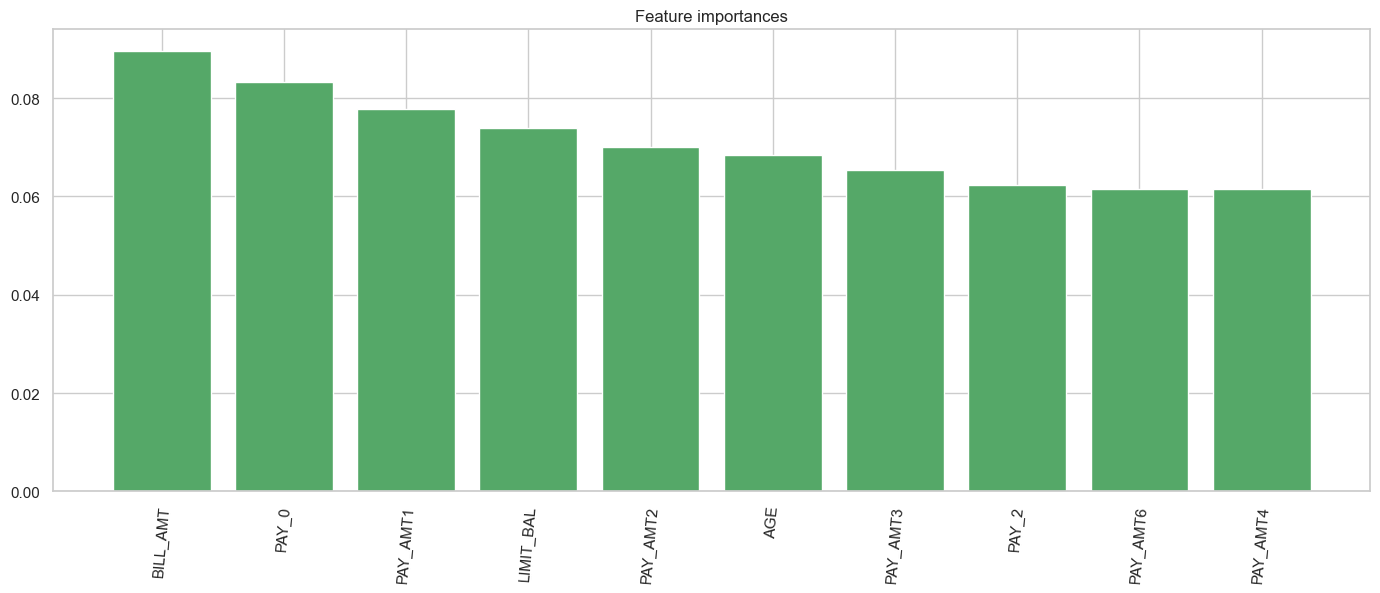

In [124]:
feature_importances_rf = pd.DataFrame(optimal_rf.feature_importances_, index = cols,
                                      columns=['importance_rf']).sort_values('importance_rf',ascending=False)[:10]
                                    
plt.subplots(figsize=(17,6))
plt.title("Feature importances")
plt.bar(feature_importances_rf.index, feature_importances_rf['importance_rf'],
        color="g",  align="center")
plt.xticks(feature_importances_rf.index, rotation = 85)
#plt.xlim([-1, X.shape[1]])
plt.show()

In [125]:
y_preds_proba_rf = optimal_rf.predict_proba(X_test)[::,1]

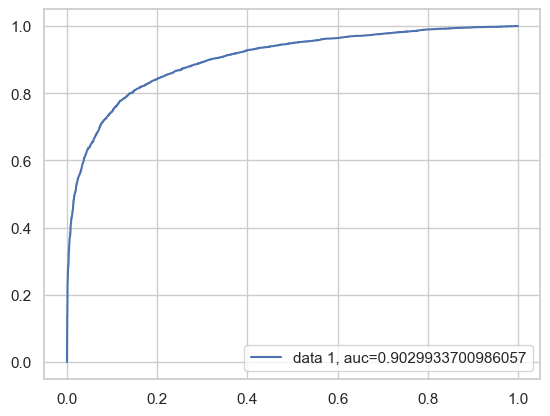

In [126]:
import sklearn.metrics as metrics
y_pred_proba = y_preds_proba_rf
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()